In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.sparse.linalg as sla
import os
import time
#img=plt.imread("./yalefaces_cropBackground/yalefaces_cropBackground/subject01.gif")
#plt.imshow(img)

In [ ]:
# Convert all files to '.gif'
filepath = "./yalefaces/"
for filename in os.listdir(filepath): 
    src = filepath + "" + filename 
    dst = filename.replace(".gif","") + ".gif"
    dst = filepath + "" + dst 
    os.rename(src, dst) 


In [2]:
filepath = "./yalefaces/"
images=[]
for filename in os.listdir(filepath):
    img = np.array(plt.imread(filepath+filename))
    img = img.flatten()
    images.append(img)

In [3]:
I=np.array(images)

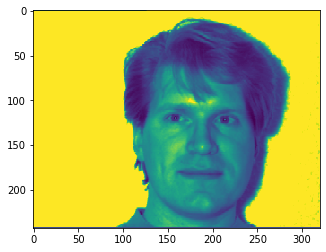

In [6]:
I.shape
plt.imshow(images[0].reshape(243,320))

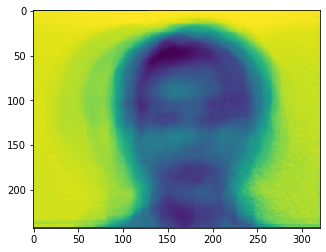

In [7]:
mean_face = np.sum(I,axis=0)/I.shape[0]
mean_face.reshape(1,77760)
mean_face_img = mean_face.reshape(243,320)
plt.imshow(mean_face_img)

In [8]:
I1=I-mean_face
I1.shape
u, s, vt = sla.svds(I1,k=60)
V=vt.transpose()
V_p=np.zeros(V.shape,dtype=np.float)

p=60
for i in range(p):
    V_p[:,i] = V[:,-(i+1)]

(165, 77760)

In [14]:
u, s, vt = sla.svds(I1,k=60)

In [15]:
V=vt.transpose()

In [ ]:
V

In [16]:
V_p=np.zeros(V.shape,dtype=np.float)

In [17]:
p=60
for i in range(p):
    V_p[:,i] = V[:,-(i+1)]

In [18]:
Z = np.matmul(I1,V_p)
X = mean_face + np.matmul(Z,V_p.transpose())

for i in range(165):
    plt.ion()
    plt.figure()
    plt.imshow(X[i].reshape(243,320))
    #time.sleep(1)
    plt.close()

In [19]:
X = mean_face + np.matmul(Z,V_p.transpose())

In [20]:
X.shape


(165, 77760)

In [ ]:
import time
for i in range(165):
    plt.imshow(X[i,:].reshape(243,320))
    

In [ ]:
for i in range(165):
    plt.imshow(X[i,:].reshape(243,320))

In [27]:
for i in range(165):
    plt.ion()
    plt.figure()
    plt.imshow(X[i].reshape(243,320))
    #time.sleep(1)
    plt.close()